<a href="https://colab.research.google.com/github/RaneemIT/Employee-Attrition-DataMining/blob/main/Python%20Notebook/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load raw dataset
raw_df = pd.read_csv("Raw_dataset.csv")

# Create a copy for preprocessing
df = raw_df.copy()

# Display first rows of the RAW dataset
print("Raw Dataset Snapshot:")
display(raw_df.head())

Raw Dataset Snapshot:


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents  

The dataset consists of 14,900 employee records with 24 features, including both numerical and categorical attributes.

How this helped us decide on preprocessing:

Identifying the presence of categorical variables indicated the need for encoding.
Confirming that there are no missing values helped determine that imputation was not required.


In [ ]:
df.describe()
#The five number summary provides insight into the distribution of numerical attributes such as Age, MonthlyIncome,
#and YearsAtCompany.
##It helps identify the spread and potential outliers in the dataset.

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832935,49.991584,1.650326,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995289,28.513611,1.553633,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


• The average employee age is approximately 38 years, with ages ranging from 18 to 59 years. The five number summary shows that most employees are between Q1=28 and Q3=49, and the median age is 38, this means the age distribution is balanced.
 • The average years at company is around 15 years, which shows that employees usually stay for a moderate period of time.
 • The average monthly income is approximately 7,287, with values ranging from 1,226 to 15,063, showing noticeable variation.
 • The average number of promotions is less than 1, which means that most employees receive few promotions.
 • The average distance from home is around 49 units, with a wide range up to 99. This shows large variation in how far employees live from work.

Overall, some numeric features such as Monthly Income, company tenure, and Distance from Home have much larger values compared to other features like Age. Because of this difference in scale, we applied Min Max normalization to scale all numeric features between 0 and 1.
How  this help for processing:
This helps ensure that all features have equal importance and prevents attributes with larger values from influencing the results more than others. Normalization improves the overall quality and fairness of the analysis.

In [ ]:
df.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


all attributes contain 0 missing values. This means the dataset is complete and does not require any missing value handling techniques

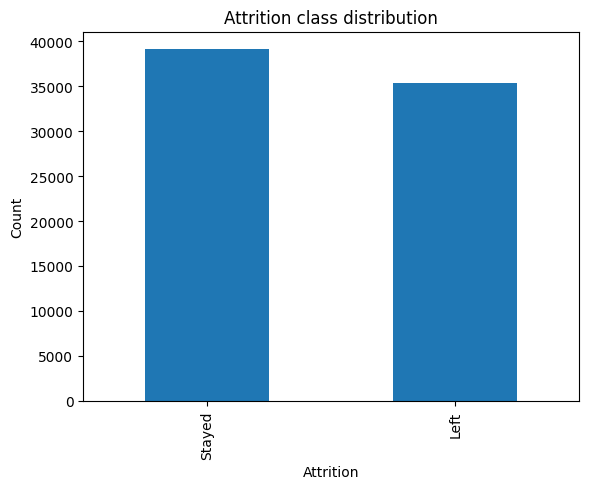

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
df["Attrition"].value_counts().plot(kind="bar")
plt.title("Attrition class distribution")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()


The bar chart shows the distribution of the class label in the dataset.
The class label has two different values: Yes and No.
The number of employees who stayed is slightly higher than those who left.

Overall, the dataset appears relatively balanced, with only minor differences between the two values.

**How this helped us decide on preprocessing:**

The relatively balanced distribution indicated that no additional class balancing techniques were required.

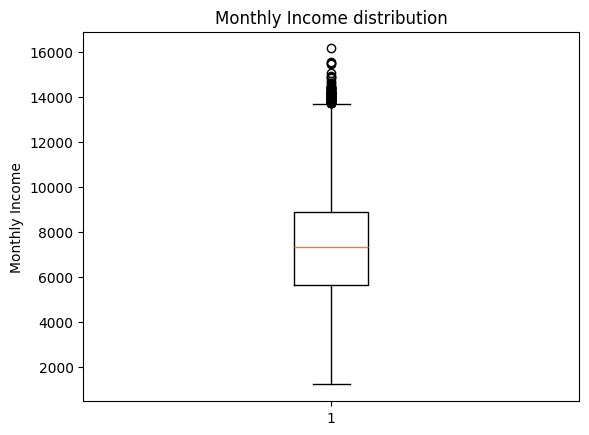

In [ ]:
plt.figure()
plt.boxplot(df["Monthly Income"])
plt.title("Monthly Income distribution")
plt.ylabel("Monthly Income")
plt.show()

Monthly Income Distribution

The boxplot shows the distribution of monthly income.
Most employees have salaries within a specific central range, as shown by the box.

However, there are some higher values above the upper whisker, which appear as outliers.
These values represent employees with significantly higher salaries compared to the majority.

Overall, the income distribution shows moderate variability with some extreme high-income values.

**How this helped us decide on preprocessing:**

The variability in income values further justified applying normalization to reduce scale impact.


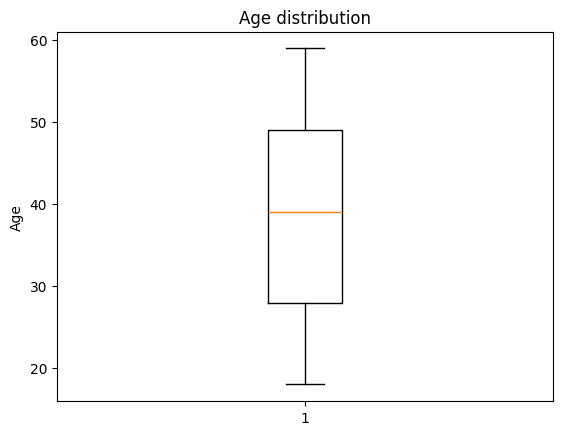

In [ ]:
plt.figure()
plt.boxplot(df["Age"])
plt.title("Age distribution")
plt.ylabel("Age")
plt.show()

Age Distribution

The boxplot shows the distribution of employee ages.
Most ages fall within a central range, with the median around the late 30s.

The values range approximately from 18 to 59 years, which is reasonable for employees.
There are no extreme abnormal values observed in the age distribution.

**How this helped us decide on preprocessing:**

Since no extreme outliers were detected, no additional transformation was needed for this feature.

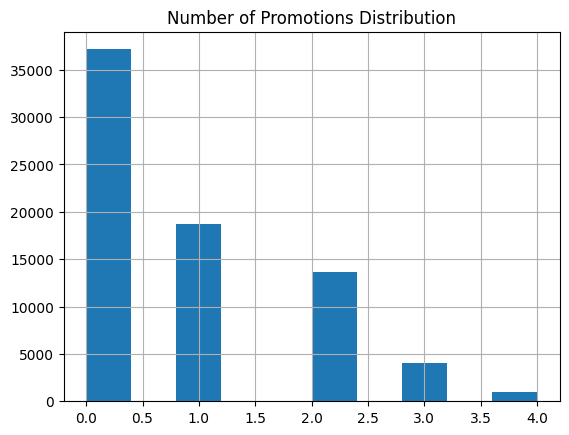

In [ ]:
import matplotlib.pyplot as plt

df["Number of Promotions"].hist()
plt.title("Number of Promotions Distribution")
plt.show()

Number of Promotions Description

The histogram shows that most employees have a low number of promotions, with very few employees having high promotion values. The distribution is right-skewed and not balanced.

**How This Helps in Pre-Processing**
Because the data is skewed and unevenly distributed, normalization was applied to scale the values and prevent this feature from dominating the model.

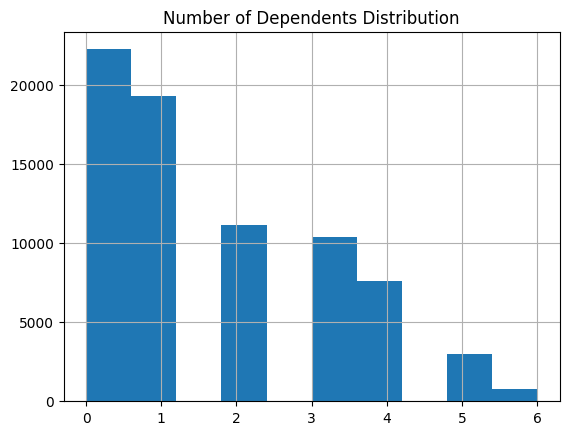

In [ ]:
import matplotlib.pyplot as plt

df["Number of Dependents"].hist()
plt.title("Number of Dependents Distribution")
plt.show()

Number of Dependents Description

The histogram shows that most employees have a low number of dependents, with fewer employees having higher values. The distribution is right-skewed.

**How This Helps in Pre-Processing**

Since the data is uneven and skewed, normalization was applied to scale the values and ensure this feature does not disproportionately influence the model.

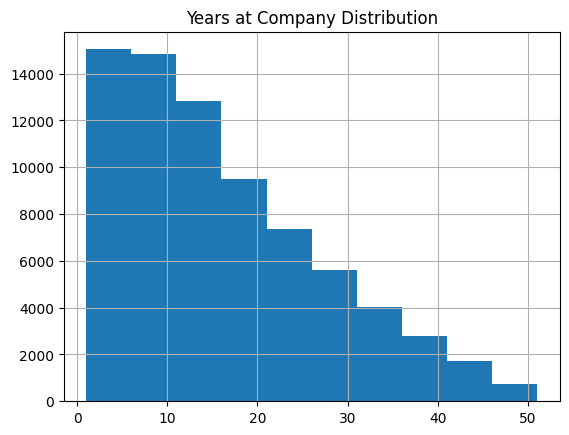

In [ ]:
import matplotlib.pyplot as plt

df["Years at Company"].hist()
plt.title("Years at Company Distribution")
plt.show()

Years at Company Description

The histogram shows that most employees have fewer years at the company, with the number decreasing as years increase. The distribution is right-skewed.

**How This Helps in Pre-Processing**

Since the data is skewed and unevenly distributed, normalization was applied to scale the feature and reduce its impact on the model.

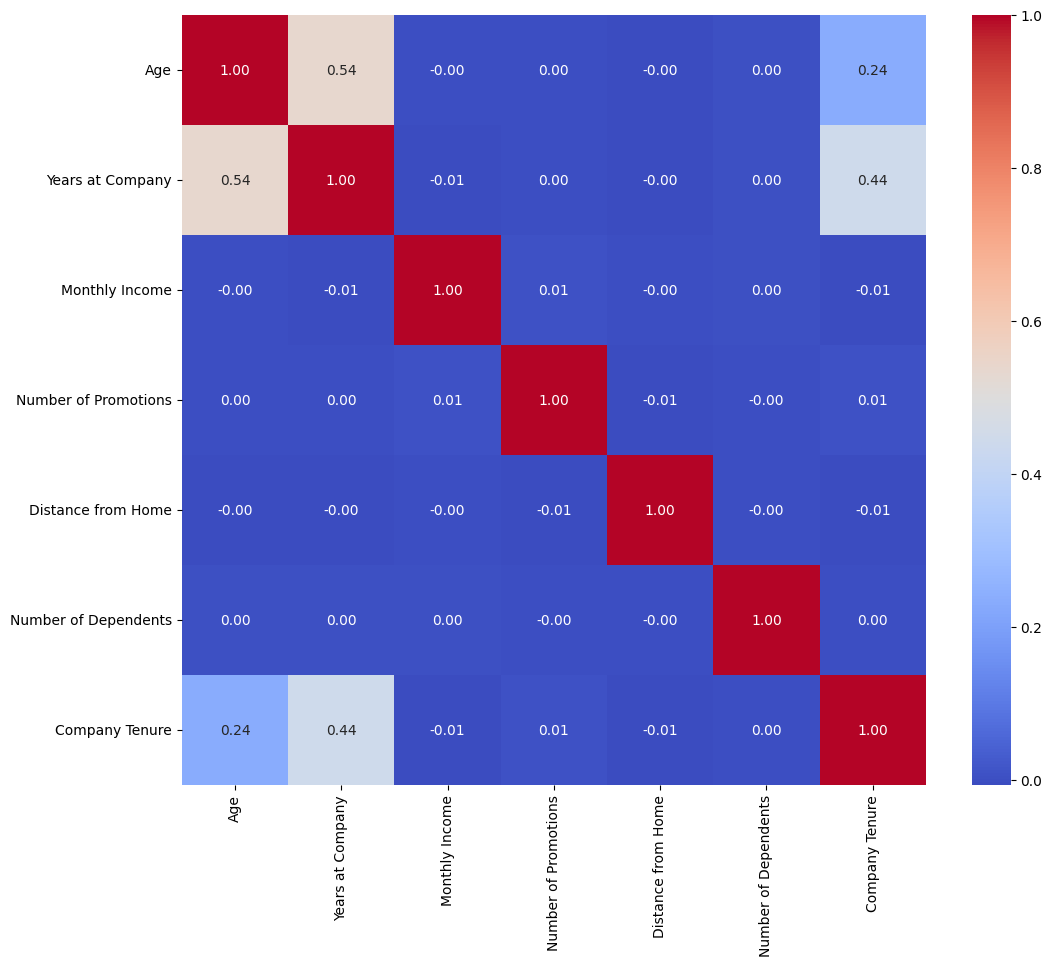

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.drop("Employee ID", axis=1).corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

The correlation heatmap shows the relationships between the numeric variables in the dataset. A moderate positive correlation (0.54) is observed between Age and Years at Company, indicating that older employees tend to have longer tenure.
There is also a moderate correlation (0.44) between Years at Company and Company Tenure, suggesting that employees who have spent more years at the company naturally have higher tenure values. Additionally, a weaker positive correlation (0.24) is observed between Age and Company Tenure.
Most other variables show very weak correlations (values close to 0), indicating that the numeric features are largely independent. Overall, there is no strong multicollinearity problem in the dataset.

In [ ]:
df.nunique().sort_values()

,0
Gender,2
Overtime,2
Remote Work,2
Leadership Opportunities,2
Innovation Opportunities,2
Attrition,2
Marital Status,3
Job Level,3
Company Size,3
Performance Rating,4


Calculating the number of unique values in each column helps us better understand the structure of the dataset before applying preprocessing techniques.

This step is important because:
 1. It allows us to identify binary attributes (columns with only two distinct values).
 2. It helps us recognize categorical attributes with multiple categories.
 3. It assists in selecting the appropriate encoding method for each feature.

we applied four preprocessing techniques to improve the dataset quality and prepare it for modeling:
 1. Normalization (Min-Max Scaling)
 2. Discretization
 3. Label Encoding
 4. Feature Selection (Embedded Method – Random Forest)

These techniques were applied to enhance data consistency, reduce variability, improve interpretability, and select the most relevant features for prediction.

In [ ]:
# Snapshot 1: Showing data before normalization
cols_to_preview = [
    'Age',
    'Years at Company',
    'Monthly Income',
    'Number of Promotions',
    'Distance from Home',
    'Company Tenure',
    'Number of Dependents'
]
print("Data BEFORE Normalization:")
display(df[cols_to_preview].head())

Data BEFORE Normalization:


,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Company Tenure,Number of Dependents
0,31,19,5390,2,22,89,0
1,59,4,5534,3,21,21,3
2,24,10,8159,0,11,74,3
3,36,7,3989,1,27,50,2
4,56,41,4821,0,71,68,0


This snapshot shows numerical features with inconsistent scales (e.g., Monthly Income vs. Age). Preprocessing is required to unify these ranges to prevent features with large values from dominating the model."

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Define numerical columns to be normalized
cols_to_scale = [
    'Age',
    'Years at Company',
    'Monthly Income',
    'Number of Promotions',
    'Distance from Home',
    'Company Tenure',
    'Number of Dependents'
]

# Apply normalization to scale features between 0 and 1
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Snapshot2: Preview the results after normalization
print("Scaled features preview (AFTER Normalization):")
display(df[cols_to_scale].head())

Scaled features preview (AFTER Normalization):


,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Company Tenure,Number of Dependents
0,0.317073,0.36,0.279032,0.50,0.214286,0.690476,0.000000
1,1.000000,0.06,0.288682,0.75,0.204082,0.150794,0.500000
2,0.146341,0.18,0.464585,0.00,0.102041,0.571429,0.500000
3,0.439024,0.12,0.185150,0.25,0.265306,0.380952,0.333333
4,0.926829,0.80,0.240903,0.00,0.714286,0.523810,0.000000



Normalization Justification :

• Why: To prevent features with large ranges ( Monthly Income ...) from dominating the model results.



• How: Applied Min Max Scaling to transform all numerical values into a range of [0, 1].

• Target Attributes:'Age',
    'Years at Company',
    'Monthly Income',
    'Number of Promotions',
    'Distance from Home',
    'Company Tenure',
    'Number of Dependents'.

• Results: All numerical values now fall within [0, 1] while maintaining original data relationships.
• Improvement:Features with different scales may affect model performance and analysis results if not normalized.

In [ ]:

target_columns = ['Age', 'Monthly Income', 'Years at Company']

print("--- Snapshot of Selected Columns BEFORE Preprocessing ---")
display(df[target_columns].head())

--- Snapshot of Selected Columns BEFORE Preprocessing ---


,Age,Monthly Income,Years at Company
0,0.317073,0.279032,0.36
1,1.000000,0.288682,0.06
2,0.146341,0.464585,0.18
3,0.439024,0.185150,0.12
4,0.926829,0.240903,0.80


In [ ]:
# Discretize normalized Age into 4 equal width bins
df['Age_Group'] = pd.cut(df['Age'],
                         bins=4,
                         labels=['Very Young', 'Young', 'Adult', 'Senior'])

print("Age after Discretization:")
display(df[['Age', 'Age_Group']].head())

Age after Discretization:


,Age,Age_Group
0,0.317073,Young
1,1.000000,Senior
2,0.146341,Very Young
3,0.439024,Young
4,0.926829,Senior


The Age attribute originally contained many distinct numerical values.
Equal width binning was applied using pd.cut() to divide it into four age categories.

This reduced the number of unique values, improved interpretability, and simplified the dataset structure for classification modeling.

In [ ]:
# Discretize normalized Monthly Income into 4 equal frequency bins
df['Income_Level'] = pd.qcut(df['Monthly Income'],
                             q=4,
                             labels=['Low', 'Medium', 'High', 'Very High'])

print("Monthly Income after Discretization:")
display(df[['Monthly Income', 'Income_Level']].head())

Monthly Income after Discretization:


,Monthly Income,Income_Level
0,0.279032,Low
1,0.288682,Low
2,0.464585,High
3,0.185150,Low
4,0.240903,Low


The Monthly Income attribute showed high variability and potential outliers.
Equal frequency binning was applied using pd.qcut() to create four balanced income categories.

This reduced the impact of extreme values and produced a more structured and balanced feature for modeling.

In [ ]:
# Discretize Years at Company into experience levels
df['Experience_Level'] = pd.cut(df['Years at Company'],
                                bins=4,
                                labels=['New', 'Junior', 'Experienced', 'Veteran'])

print("Years at Company after Discretization:")
display(df[['Years at Company', 'Experience_Level']].head())

Years at Company after Discretization:


,Years at Company,Experience_Level
0,0.36,Junior
1,0.06,New
2,0.18,New
3,0.12,New
4,0.80,Veteran


The Years at Company attribute contained many continuous tenure values.
Equal width binning was applied using pd.cut() to group employees into four experience levels.

This reduced variability, simplified the feature representation, and improved dataset interpretability.

In [ ]:

processed_display_cols = [
    'Age', 'Age_Group',
    'Monthly Income', 'Income_Level',
    'Years at Company', 'Experience_Level']

print("--- Snapshot of Selected Columns AFTER Discretization (Processed) ---")
display( df[processed_display_cols].head())

--- Snapshot of Selected Columns AFTER Discretization (Processed) ---


,Age,Age_Group,Monthly Income,Income_Level,Years at Company,Experience_Level
0,0.317073,Young,0.279032,Low,0.36,Junior
1,1.000000,Senior,0.288682,Low,0.06,New
2,0.146341,Very Young,0.464585,High,0.18,New
3,0.439024,Young,0.185150,Low,0.12,New
4,0.926829,Senior,0.240903,Low,0.80,Veteran


After applying discretization, a snapshot of the dataset was displayed using df.head() to verify that the new categorical features were successfully created.

This step allows comparison between the raw dataset and the preprocessed dataset, ensuring that the transformations were correctly applied and that the dataset structure remains consistent.

In [ ]:
# Identify categorical columns that contain text (Objects)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Display a preview of categorical columns before transformation
print("Snapshot 1: Categorical Columns Before Label Encoding")
display(df[categorical_cols].head())

Snapshot 1: Categorical Columns Before Label Encoding


,Gender,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,Age_Group,Income_Level,Experience_Level
0,Male,Education,Excellent,Medium,Average,No,Associate Degree,Married,Mid,Medium,No,No,No,Excellent,Medium,Stayed,Young,Low,Junior
1,Female,Media,Poor,High,Low,No,Master’s Degree,Divorced,Mid,Medium,No,No,No,Fair,Low,Stayed,Senior,Low,New
2,Female,Healthcare,Good,High,Low,No,Bachelor’s Degree,Married,Mid,Medium,No,No,No,Poor,Low,Stayed,Very Young,High,New
3,Female,Education,Good,High,High,No,High School,Single,Mid,Small,Yes,No,No,Good,Medium,Stayed,Young,Low,New
4,Male,Education,Fair,Very High,Average,Yes,High School,Divorced,Senior,Medium,No,No,No,Fair,Medium,Stayed,Senior,Low,Veteran


The following snapshot shows the raw data before any changes. Numerical attributes like 'Age' and 'Monthly Income' have high variability, while categorical attributes like 'Job Role' are in text format. This raw state requires preprocessing to simplify the data and make it ready for mining algorithms.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. Initialize LabelEncoder
le = LabelEncoder()

# 2. Transform the Target variable (Attrition) from Yes/No to 1/0
df['Attrition'] = le.fit_transform(df['Attrition'])

# 3. Transform other categorical columns (Object types,) to numbers
categorical_cols = df.select_dtypes(include=['object','category']).columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# 4. Verify the transformation results
print("Sample of encoded data:\n")
display(df[categorical_cols].head())

Sample of encoded data:



,Gender,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Age_Group,Income_Level,Experience_Level
0,1,0,0,2,0,0,0,1,1,1,0,0,0,0,2,3,1,1
1,0,3,3,0,3,0,3,0,1,1,0,0,0,1,1,1,1,2
2,0,2,2,0,3,0,1,1,1,1,0,0,0,3,1,2,0,2
3,0,0,2,0,2,0,2,2,1,2,1,0,0,2,2,3,1,2
4,1,0,1,3,0,1,2,0,2,1,0,0,0,1,2,1,1,3


Label Encoding Justification:

* Why: Machine learning models require numerical input for computations and cannot process textual data directly.
* How: We used LabelEncoder to transform categorical columns (Gender, Job Role, etc.) into unique integer values.
* Results: All text-based attributes are now represented as numerical labels (0, 1, 2, ...).
* Improvement: The dataset is now fully numerical, making it suitable for further analysis and modeling in the next phase.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Get all object and category columns from df
# This includes 'Attrition' if it's still an object type
object_cols = df.select_dtypes(include=['object', 'category']).columns

# Apply LabelEncoder to each identified object/category column in df
for col in object_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Define features (X) and target (y)
# We drop 'Attrition' because it's the target and 'Employee ID' because it's irrelevant for prediction
X = df.drop(['Attrition', 'Employee ID'], axis=1)
y = df['Attrition'] # Now y should be numerical due to encoding above

# Initialize and fit the Random Forest model to calculate feature importance
# This represents the Embedded Method approach from the textbook
selector_model = RandomForestClassifier(n_estimators=100, random_state=42)
selector_model.fit(X, y)

feature_importance = pd.Series(selector_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print(feature_importance)

Job Level                   0.099350
Marital Status              0.086020
Distance from Home          0.082393
Monthly Income              0.077066
Company Tenure              0.073557
Age                         0.063474
Years at Company            0.062625
Remote Work                 0.049084
Work-Life Balance           0.042700
Number of Dependents        0.039327
Education Level             0.038891
Number of Promotions        0.036122
Company Reputation          0.028009
Job Role                    0.027929
Employee Recognition        0.026847
Job Satisfaction            0.025063
Performance Rating          0.023299
Company Size                0.021922
Income_Level                0.021642
Age_Group                   0.019568
Gender                      0.014299
Experience_Level            0.013545
Overtime                    0.012042
Innovation Opportunities    0.009910
Leadership Opportunities    0.005317
dtype: float64


Feature Selection (Embedded Method)

We applied the Embedded Method using the RandomForestClassifier to identify the most significant features influencing 'Attrition'. We excluded Employee ID because it is a unique identifier that does not contribute to the model's predictive power and acts as noise. This step ensures that our model focuses only on relevant attributes, reducing complexity and preventing Overfitting

Top 10 Most Important Features:
Job Level               0.099350
Marital Status          0.086020
Distance from Home      0.082393
Monthly Income          0.077066
Company Tenure          0.073557
Age                     0.063474
Years at Company        0.062625
Remote Work             0.049084
Work-Life Balance       0.042700
Number of Dependents    0.039327
dtype: float64


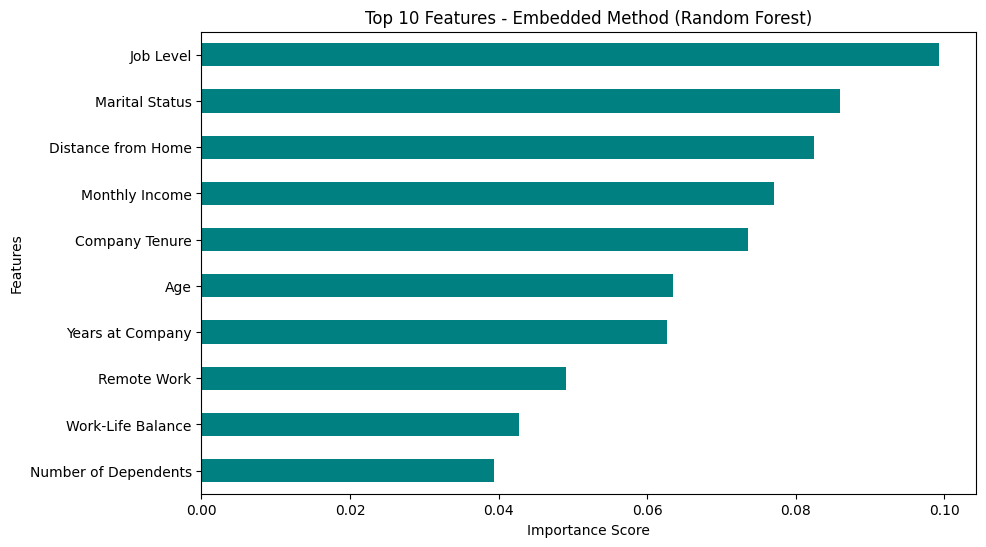

In [ ]:
import matplotlib.pyplot as plt

# Create a Series to organize the scores with their corresponding feature names
feat_importances = pd.Series(selector_model.feature_importances_, index=X.columns)

# Select and plot the top 10 features for better model interpretability
print("Top 10 Most Important Features:")
print(feat_importances.nlargest(10))

# Visualize the feature importance using a horizontal bar chart
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='teal', figsize=(10, 6))
plt.title("Top 10 Features - Embedded Method (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

Results: The horizontal bar chart reveals that Monthly Income, Age, and Years at Company are the top predictors for employee attrition.

Improvement: By focusing on the top 10 features, we have simplified the dataset structure and ensured that the data is consistent. This optimization will lead to a more accurate and faster Decision Tree model in the next phase

In [ ]:
import pandas as pd

# 1. Load the raw data
raw_df = pd.read_csv('Raw_dataset.csv')

# 2. Snapshot 1: Raw Data (Before Feature Selection)
print("Snapshot 1: Original Dataset Before Feature Selection")
display(raw_df.head())

Snapshot 1: Original Dataset Before Feature Selection


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


Snapshot 1 represents the raw state of the dataset, containing redundant columns and uncleaned data that are unsuitable for mining

In [ ]:
# 3. Snapshot 2: Processed Data (After Feature Selection)
# We display only the top 10 features identified in the previous step
top_10_features = feat_importances.nlargest(10).index
print("\nSnapshot 2: Processed Dataset with Top 10 Features")
display(df[top_10_features].head())


Snapshot 2: Processed Dataset with Top 10 Features


,Job Level,Marital Status,Distance from Home,Monthly Income,Company Tenure,Age,Years at Company,Remote Work,Work-Life Balance,Education Level
0,1,1,0.836735,0.491653,0.160,0.439024,0.24,0,0,3
1,0,2,0.551020,0.241165,0.200,0.414634,0.12,0,2,0
2,2,0,0.132653,0.314880,0.592,0.780488,0.12,0,1,0
3,0,2,0.428571,0.310689,0.752,0.975610,0.86,0,1,3
4,1,1,0.469388,0.244128,0.344,0.512195,0.46,1,2,3


Snapshot 2 verifies the transition to a refined dataset. By focusing only on the top 10 predictors (Monthly Income, Age), we reduce noise and improve model interpretability

In [ ]:
# Select only the top 10 features identified during the feature selection process
final_processed_df = df[top_10_features]

# Save the processed data into a separate CSV file as required
# 'index=False' is used to prevent pandas from adding an extra ID column
final_processed_df.to_csv('Preprocessed_dataset.csv', index=False)

# Display a preview of the saved file to verify the results
print("Final preprocessed dataset saved successfully.")
display(final_processed_df.head())